# Adani Green Stock Price Prediction

# Import libraries

In [1]:
import pandas as pd

#load the data set
df = pd.read_csv('Adani_green.csv')
#date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2018-06-18,2018-06-18,30.000000,31.500000,28.500000,31.500000,31.500000,7006229
2018-06-19,2018-06-19,32.700001,33.049999,31.000000,32.599998,32.599998,2895692
2018-06-20,2018-06-20,31.500000,32.200001,31.000000,31.000000,31.000000,1115553
2018-06-21,2018-06-21,29.450001,30.000000,29.450001,29.650000,29.650000,2854524
2018-06-22,2018-06-22,28.200001,29.799999,28.200001,29.450001,29.450001,1612972


# Select the date and price 

In [3]:
df = df[['Date','Close']]
#rename the features
df = df.rename(columns={'Date' : 'ds', 'Close':'y'})

df

,ds,y
2018-06-18,2018-06-18,31.500000
2018-06-19,2018-06-19,32.599998
2018-06-20,2018-06-20,31.000000
2018-06-21,2018-06-21,29.650000
2018-06-22,2018-06-22,29.450001
...,...,...
2021-12-28,2021-12-28,1398.800049
2021-12-29,2021-12-29,1392.650024
2021-12-30,2021-12-30,1311.050049
2021-12-31,2021-12-31,1330.250000


# Get all the rows in the data set except for the last 20 years

In [34]:
df = df[:-30]
df

,ds,y
2018-06-18,2018-06-18,31.500000
2018-06-19,2018-06-19,32.599998
2018-06-20,2018-06-20,31.000000
2018-06-21,2018-06-21,29.650000
2018-06-22,2018-06-22,29.450001
...,...,...
2021-07-19,2021-07-19,979.150024
2021-07-20,2021-07-20,945.099976
2021-07-22,2021-07-22,988.250000
2021-07-23,2021-07-23,980.250000


# Getting Prophet library 

In [8]:
from prophet import Prophet
import plotly.graph_objects as go
#creat an object
Adani_green = Prophet(daily_seasonality = True)

#fit or train model

Adani_green.fit(df)
future = Adani_green.make_future_dataframe(periods=730) # 2 years
forecast = Adani_green.predict(future)

# Import prophet plotting library 

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly
#plot the data

plot_plotly(Adani_green, forecast)

# Show the model predicition

In [35]:
forecast[forecast.ds == '2021-07-26']['yhat']

764    1033.941623
Name: yhat, dtype: float64

# Show actual value for the stock


In [32]:
last = df[len(df)-100:]

# Show the actuall value

In [36]:
last[last.ds == '2021-07-26']['y']

2021-07-26    942.200012
Name: y, dtype: float64

# Monte-Carlo- Simulation Adani Green

# Import Libraries

In [37]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 

# Extract the data from Yahoo Finance

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

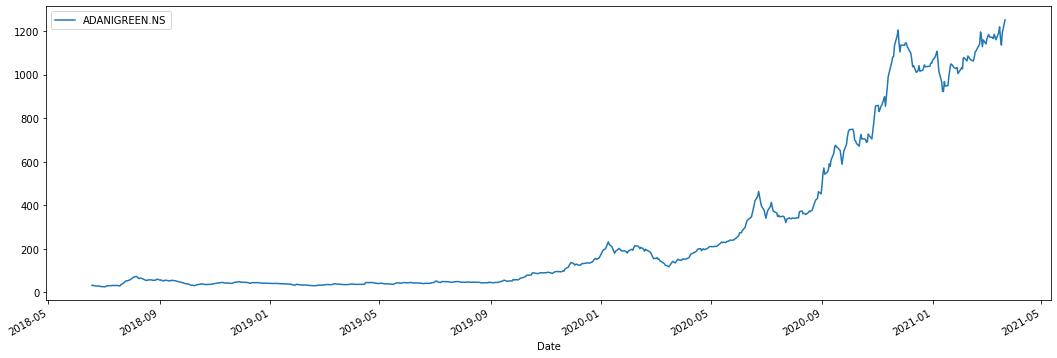

In [39]:
ticker = ('ADANIGREEN.NS')
stock_data = pd.DataFrame() 
stock_data[ticker]= yf.download(ticker,start='2010-12-27',end= '2021-03-23')['Adj Close']
#Plot Adani_Green Stock 
stock_data.plot(figsize=(18,6))

# Calculate historical Log_return

<AxesSubplot:ylabel='Density'>

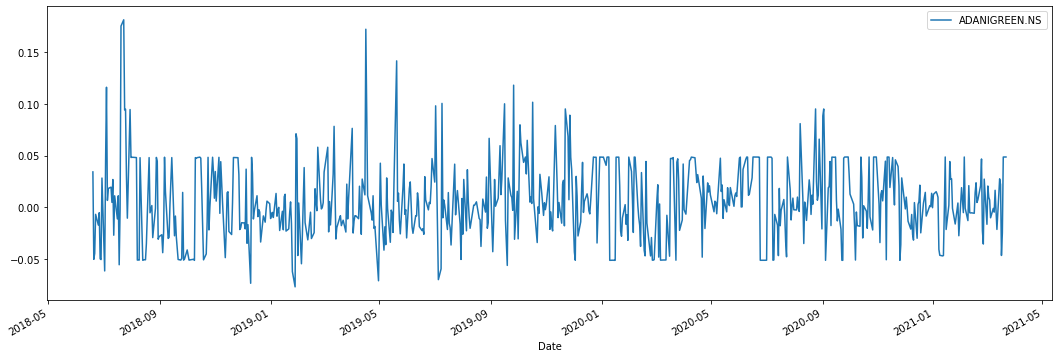

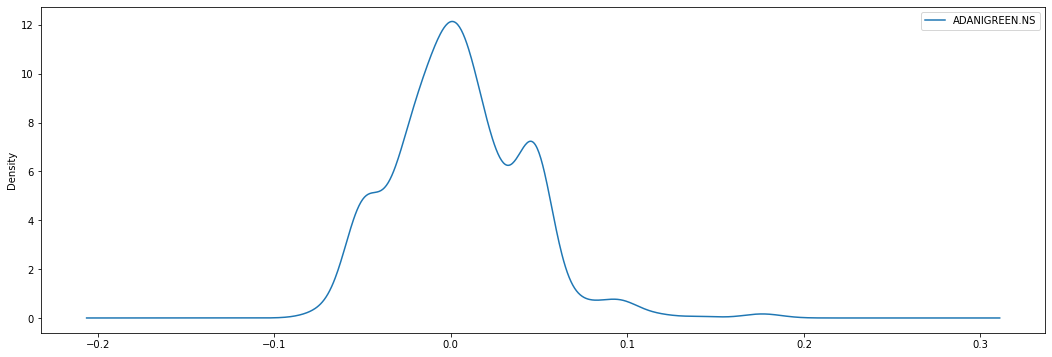

In [40]:
log_return = np.log(1+stock_data.pct_change())
#show all the log return
log_return.plot(figsize=(18,6))
#Show the distribution of the log return
log_return.plot.density(figsize=(18,6))

# Calculate key statistical measures

In [41]:
mean = log_return.mean()
variance = log_return.var()
standard_deviation = log_return.std()
drift = mean - (0.5 * variance) 

# Explain Values

In [42]:
print(drift,drift.values)

ADANIGREEN.NS    0.004744
dtype: float64 [0.00474353]


# Explain np.random.rand

In [43]:
test1 = np.random.rand(2,5)
test1

array([[0.46671642, 0.76070122, 0.55620017, 0.80341976, 0.45306456],
       [0.7272488 , 0.21147856, 0.84106817, 0.27653736, 0.6549122 ]])

# Explain norm.ppf

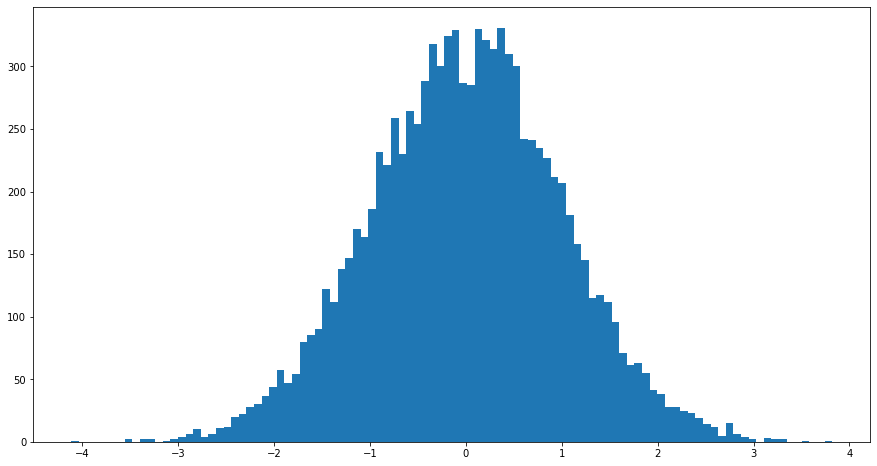

In [48]:
test2 = norm.ppf(np.random.rand(10000))
plt.figure(figsize = (15,8))
plt.hist(test2, bins = 100);

# Forecast Future Daily Returns

In [49]:
t_interval = 250
simulate = 10000
daily_simulatedreturns = np.exp(drift.values + standard_deviation.values * norm.ppf(np.random.rand(t_interval,simulate)))
daily_simulatedreturns

array([[1.03633137, 1.01697861, 1.03127722, ..., 0.96220327, 1.01990909,
        0.99708472],
       [1.03561517, 0.93322837, 0.98428352, ..., 1.01546346, 0.9658552 ,
        0.98538792],
       [0.9653104 , 0.93569707, 1.02084156, ..., 0.9588023 , 1.02211475,
        0.95121311],
       ...,
       [1.0253661 , 1.00160351, 1.06474817, ..., 0.9617814 , 1.08113308,
        1.05285186],
       [1.015155  , 0.98684385, 1.01453544, ..., 1.02846121, 1.00463948,
        1.02858152],
       [0.99341236, 1.00289453, 0.98653313, ..., 1.03239999, 1.05295398,
        1.08220502]])

# Create the variable for the latest price of Adani Green

In [50]:
last_price = stock_data.iloc[-1]

#prepare an array for the price simulation
price_list = np.zeros_like(daily_simulatedreturns)

#set the first row to the starting stock price 
price_list[0] = last_price
price_list

array([[1252.19995117, 1252.19995117, 1252.19995117, ..., 1252.19995117,
        1252.19995117, 1252.19995117],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

# Monte Carlo Simulation Outcome Adani_Green

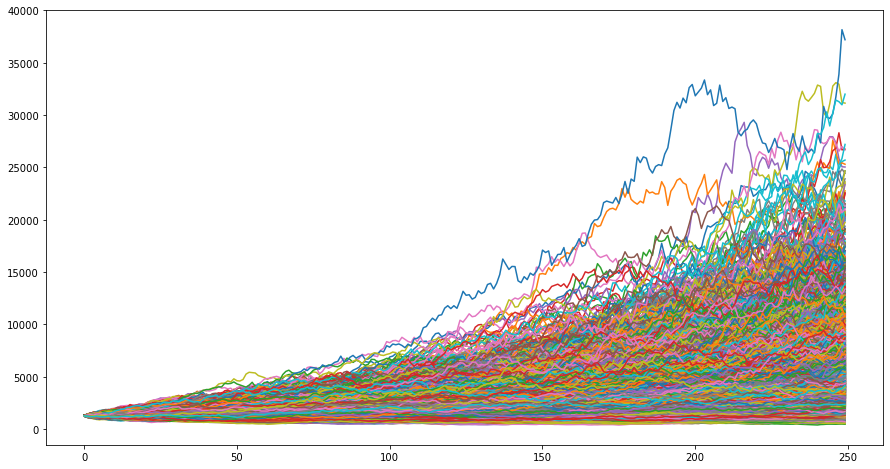

In [53]:
# apply for loop to simulated prices 
for t in range(1, t_interval):
    price_list[t] = price_list[t-1] * daily_simulatedreturns[t]
# plot the the graph of future 10,000 prices
plt.figure(figsize=(15,8))
plt.plot(price_list);

# Bull, Bear & Base case scenario

In [55]:
print ("Bear Case Share Price:")
round(price_list.min())

Bear Case Share Price:


381

In [56]:
print ("Bull Case Share Price:")
round(price_list.max())

Bull Case Share Price:


38139

In [57]:
print ("Average Case Share Price:")
round(price_list.mean())

Average Case Share Price:


2652

# Calculating Stock Price as 68% & 95% Confidence level

In [58]:
# set up confidence intervals
upper68 = price_list[-1].mean() + price_list[1].std()
lower68 = price_list[-1].mean() - price_list[1].std()
upper95 = price_list[-1].mean() + price_list[1].std()*2
lower95 = price_list[-1].mean() - price_list[1].std()*2

In [59]:
#print the values 68% Price range
print("68% Price Range upper")
round(upper68)

68% Price Range upper


4889

In [60]:
#print the values 68% Price range
print("68% Price Range lower")
round(lower68)

68% Price Range lower


4797

In [61]:
#print the values 95% Price range
print("95% Price Range lower")
round(lower95)

95% Price Range lower


4751

In [62]:
#print the values 95% Price range
print("95% Price Range upper")
round(upper95)

95% Price Range upper


4935

# Value at Risk Adani_Green

# Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

# No of Shares to Buy

In [64]:
no_of_shares = 100

#Live stock price 
price = yf.Ticker('ADANIGREEN.NS')
print("ADANI_GREEN")
print("--------")
price_ADANI = price.history().tail(1)['Close'].iloc[0]
price_ADANI

ADANI_GREEN
--------


1366.699951171875

# Investment value

In [65]:
value = price_ADANI * no_of_shares
# Risk Free rate of India
rfr = 0.06
#Volatility of Adani Green
vol = 0.22

# Number of Simulation 50,000

In [66]:
simulate = 50000
#Investment time in year 
time = 127/252

# Creating Random array on no. of Simulations

(array([2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 4.000e+00, 9.000e+00, 6.000e+00, 1.400e+01,
        1.900e+01, 2.500e+01, 2.300e+01, 4.100e+01, 4.000e+01, 5.100e+01,
        6.800e+01, 7.700e+01, 1.000e+02, 1.040e+02, 1.460e+02, 1.720e+02,
        2.120e+02, 2.720e+02, 2.870e+02, 3.070e+02, 3.630e+02, 4.110e+02,
        4.930e+02, 5.150e+02, 5.880e+02, 6.460e+02, 7.860e+02, 7.810e+02,
        9.300e+02, 9.480e+02, 1.107e+03, 1.215e+03, 1.278e+03, 1.293e+03,
        1.353e+03, 1.389e+03, 1.480e+03, 1.483e+03, 1.529e+03, 1.577e+03,
        1.629e+03, 1.626e+03, 1.634e+03, 1.529e+03, 1.610e+03, 1.579e+03,
        1.492e+03, 1.471e+03, 1.365e+03, 1.329e+03, 1.270e+03, 1.211e+03,
        1.125e+03, 1.000e+03, 9.260e+02, 8.940e+02, 7.640e+02, 7.150e+02,
        6.390e+02, 5.730e+02, 5.160e+02, 4.160e+02, 4.040e+02, 3.510e+02,
        2.820e+02, 2.600e+02, 2.080e+02, 1.960e+02, 1.610e+02, 1.290e+02,
        9.900e+01, 8.300e+01, 6.700e+0

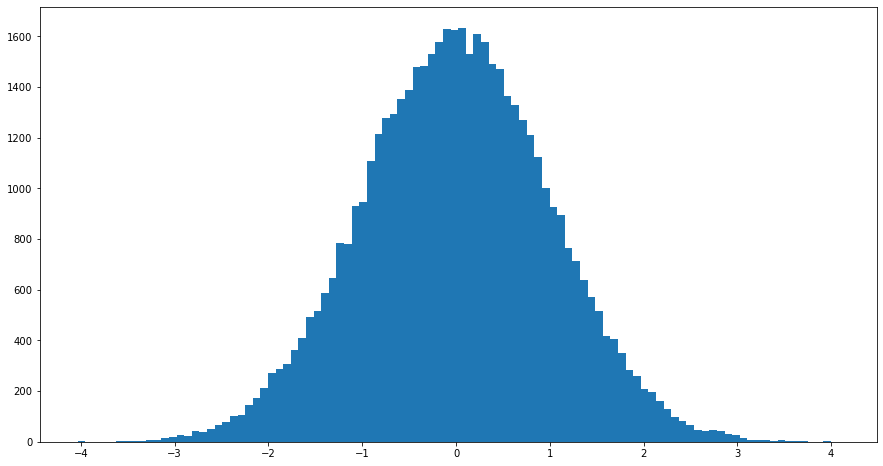

In [67]:
sample = np.random.standard_normal(simulate)
plt.figure(figsize=(15,8))
plt.hist(sample,bins  =100)

# Print Mean & Standard Deviation

In [68]:
print(np.mean(sample))
print(np.std(sample))

0.0020119924342367345
1.0007511000484866


# Create a Function for Value at Risk

In [69]:
def VaR(pv,rfr,time,simulate,vol):
    end_value = pv * np.exp((rfr - 0.5 * vol **2)*time + np.random.standard_normal(simulate) * vol * np.sqrt(time))
    returns = end_value - pv
    return returns
#Apply VaR function to simulate the returns 
returns_ADANI = VaR(value,rfr,time,simulate,vol)

# Plot the Returns

VaR at 90% confidence level: -22,942
VaR at 95% confidence level: -29,093
VaR at 99% confidence level: -39,553


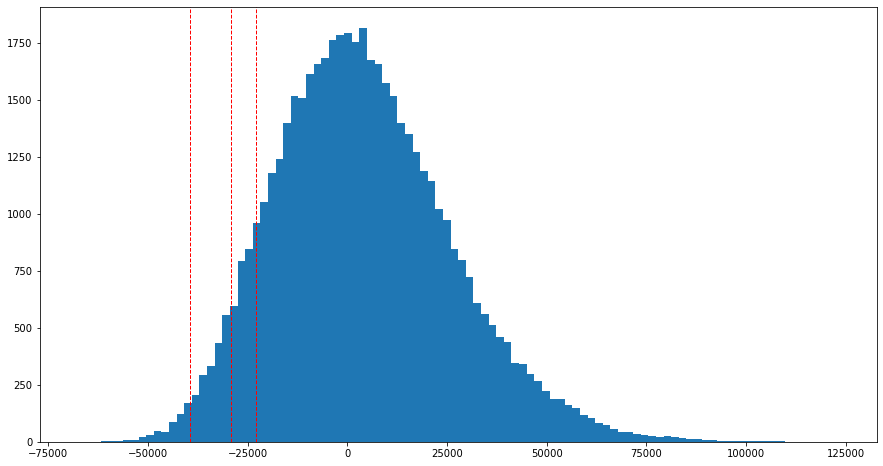

In [72]:
plt.figure(figsize=(15,8))
plt.hist(returns_ADANI,bins =100);
#show VaR at 90%,95% and 99% confidence level
percentile = [10,5,1]

for i in percentile:
    confidence = (100-i)/100
    value = np.percentile(returns_ADANI,i)
    print("VaR at {:.0%} confidence level: {:,.0f}".format(confidence,value))
    plt.axvline(value, color= 'red',linestyle='dashed',linewidth=1)
